<a href="https://colab.research.google.com/github/swb1113/CIND820/blob/main/CIND820_Final_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sang Won Baek**

**Student ID: 501144120**

**Supervisor: Uzair Ahmad, Ph.D**

**Date: July 25, 2022**

**GITHUB REPOSITORY:** **ADD REPOSITORY**

# **Importing Kaggle Dataset:**

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

In [ ]:
%cd /content/gdrive/MyDrive/kaggle

/content/gdrive/MyDrive/kaggle


In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 1.30MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  heart-failure-prediction.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# **Library Imports:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve

# **Exploratory Data Analysis and Visualization:**

**Attribute Definitions:**

**Age**: age of the patient (years)

**Sex**: sex of the patient (M: Male, F: Female)

**ChestPainType**: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

**RestingBP**: resting blood pressure (mm Hg)

**Cholesterol**: serum cholesterol (mm/dl)

**FastingBS**: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)

**RestingECG**: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)

**MaxHR**: maximum heart rate achieved (Numeric value between 60 and 202)

**ExerciseAngina**: exercise-induced angina (Y: Yes, N: No)

**Oldpeak**: oldpeak = ST (Numeric value measured in depression)

**ST_Slope**: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

**HeartDisease**: output class (1: heart disease, 0: Normal)

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/kaggle/heart.csv")

In [ ]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [ ]:
df.sample(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
111   57   M           ASY        150          255          0     Normal   
108   50   M           ASY        140          129          0     Normal   
102   40   F           ASY        150          392          0     Normal   
540   62   M           NAP        138          204          0         ST   
428   62   M           ASY        110            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
111     92              Y      3.0     Flat             1  
108    135              N      0.0       Up             0  
102    130              N      2.0     Flat             1  
540    122              Y      1.2     Flat             1  
428    120              Y      0.5     Flat             1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print("There are", df.shape[0], "observations and", df.shape[1], "attributes in the heart failure dataset.")

There are 918 observations and 12 attributes in the heart failure dataset.


**Descriptive Statistics of Numeric attributes**

In [ ]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

FastingBS and HeartDisease are integer data types but are categorical attributes. Age, RestingBP, Cholesterol, and MaxHR may be close to normal distribution. However, more exploatory analysis will give a clearer picture.

**looking at categorical attribute data (except HeartDisease (for now))**

In [ ]:
df.describe(include=object).T

count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460

At initial glance, most of the patients in the dataset seem to be male (725 out of 918) and most patient's FastingBS is not over 120 mg/dl (704 out of 918).

**Checking for any missing/null values**

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in the dataset.

**HeartDisease (Target) Variable Exploratory Analysis:**

In [ ]:
df['HeartDisease'] = df['HeartDisease'].astype("object")
df['HeartDisease'].describe(include=object).T

count     918
unique      2
top         1
freq      508
Name: HeartDisease, dtype: int64

1    508
0    410
Name: HeartDisease, dtype: int64


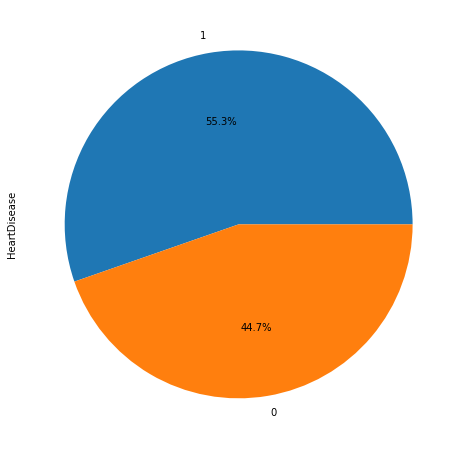

In [ ]:
print(df["HeartDisease"].value_counts(dropna = False))
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8,8));

# 1 --> Heart Disease
# 0 --> Normal 

The dataset contains 508 (55.3%) of patients with heart disease and 410 (44.7%) of patients with no heart disease.

**Correlation Analysis:**

In [ ]:
df['HeartDisease'] = df['HeartDisease'].astype("int64")
px.imshow(df.corr(),title="Correlation Plot of Heart Failure Prediction",
          width=1000, height=500)

The Correlation plot indicates that heart disease has a negative correlation with max heartrate (-0.4) and a (weaker) negative correlation with cholesterol (-0.23). On the other hand, heart disease has a positive correlation with oldpeak (0.4), age (0.28), fastingbs (0.27), and restingbp (0.1). 

**Heart Disease in relation to Sex:**

In [ ]:
fig = px.histogram(df, 
                   x="HeartDisease",
                   color="Sex",
                   hover_data=df.columns,
                   title="Heart Disease Count Distinguished by Sex",
                   barmode="group",
                   width=1000, height=500)

fig.show()

In [ ]:
print(df["Sex"].value_counts(dropna = False))
fig=px.histogram(df,
                 x="Sex",
                 color="Sex",
                 hover_data=df.columns,
                 title="Sex count in the Dataset",
                 width=1000, height=500)
fig.show()

M    725
F    193
Name: Sex, dtype: int64


The plots show that a larger proportion of males in the dataset experienced heart disease opposed to females. 

percentage of males with heart disease = 63.2% (458/725)

percentage of females with heart disease = 25.9% (50/193)

There may be factors outside of "sex" that influence why males seem to be more affected by heart disease.



**Types of Chest Pain in Relation to Sex:**

In [ ]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain Distinguished by Sex",
                 width=1000, height=500)
fig.show()

percentage of males experiencing chestpain (typical angina, atypical angina, or non-anginal pain) = (113 + 36 + 150)/725 = **41.2%**

percentage of females experiencing chestpain (typical angina, atypical angina, or non-anginal pain) = (60 + 10 + 53)/193 = **63.7%**


percentage of males asymptomatic = 426/725 = **58.8%**

percentage of females asymptomatic = 70/193 = **36.3%**

The plots indicate that while males are more likely to experience heart disease, they are less likely to experience (or report) chest pain than females. This may indicate that males are more likely to experience heart disease due to reluctance to report or ignore chest pain which may further develop into more complex heart disease. Therefore, there may be an under-reporting of male chest pain as males may tend to ignore their chest pains in contrast to females. However, more research and analysis must be performed to confirm the correlation between chest pain, heart disease and sex.   

**Brief look at Resting ECG, ExerciseAngina, and ST_Slope:**

In [ ]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG",
                 width=1000, height=500)
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="ExerciseAngina",
                 hover_data=df.columns,
                 title="Distribution of Exercise Angina",
                 width=1000, height=500)
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="ST_Slope",
                 hover_data=df.columns,
                 title="Distribution of ST_Slope",
                 width=1000, height=500)
fig.show()

**Multiple Pairwise Bivariate Distributions:**

[]

<Figure size 1080x720 with 0 Axes>

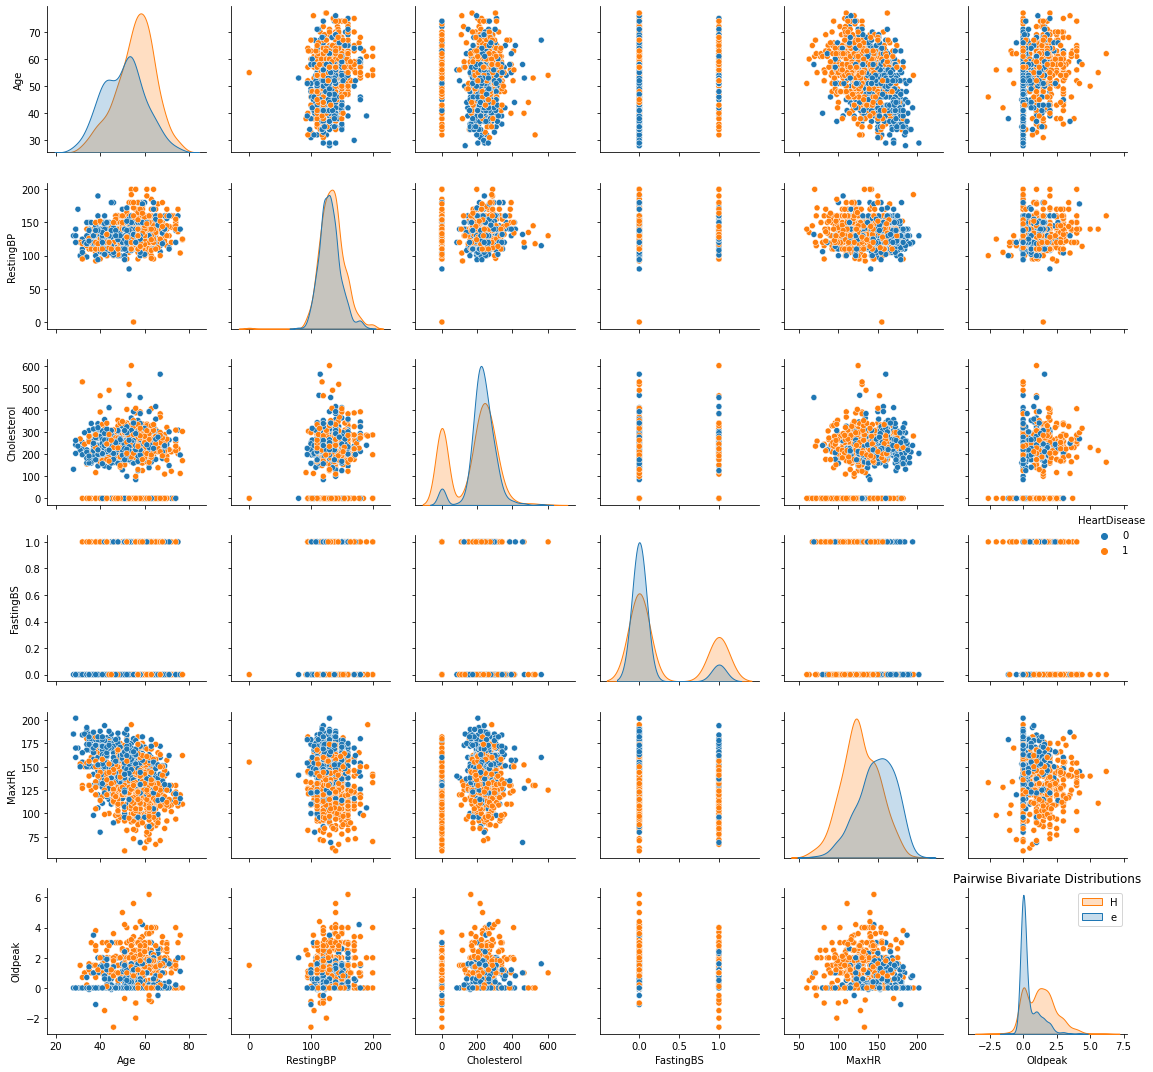

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Pairwise Bivariate Distributions")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()


**Intersting Insight:**

The plot shows us that regardless of any other numeric attribute (age, RestingBP, Cholesterol, FastingBS, MaxHR, and oldPeak), a patient is more prone to heart disease if they have a lower MaxHR (around below 150).

**Outlier Analysis:**

In [ ]:
fig = px.box(df,
             y="Age",
             x="HeartDisease",
             title="Age Boxplot",
             width=1000, height=600)
fig.show()

In [ ]:
fig = px.box(df,y="RestingBP",
             x="HeartDisease",
             title="RestingBP Boxplot",
             width=1000, height=600)
fig.show()

In [ ]:
fig = px.box(df,
             y="Cholesterol",
             x="HeartDisease",
             title="Cholesterol Boxplot",
             width=1000, height=600)
fig.show()

In [ ]:
fig = px.box(df,
             y="Oldpeak",
             x="HeartDisease",
             title="Oldpeak Boxplot",
             width=1000, height=600)
fig.show()

In [ ]:
fig = px.box(df,
             y="MaxHR",
             x="HeartDisease",
             title="MaxHR Boxplot",
             width=1000, height=600)
fig.show()

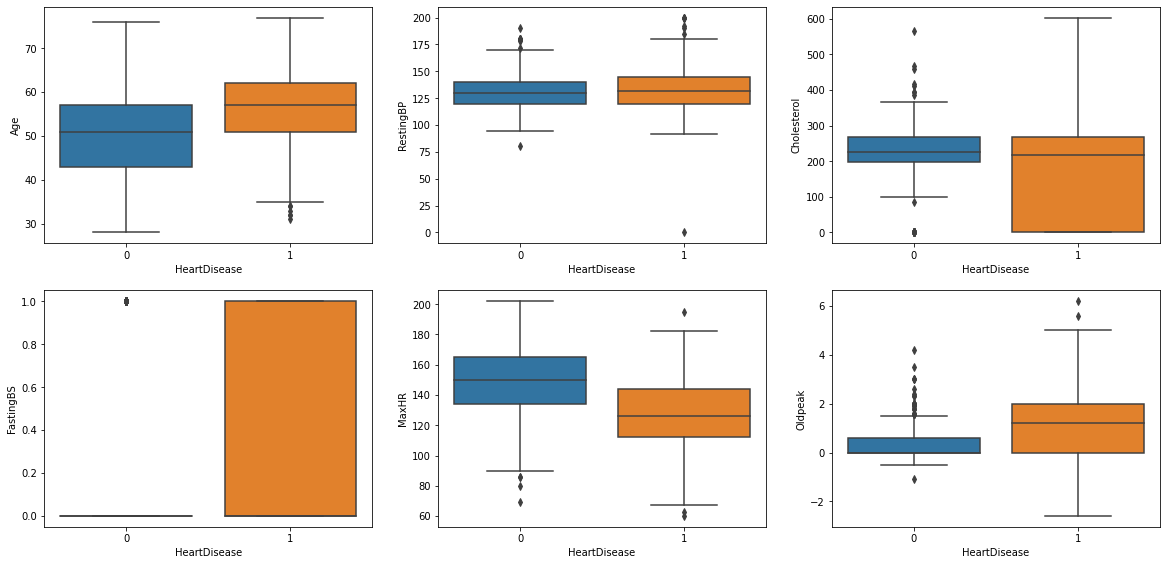

In [ ]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=df)

**Analysis of Boxplots:**

Most of the outliers tend to be concentrated in oldpeak and cholesterol with those with no heart disease. When looking at the dataset as a whole, the outliers only compose a small percentage of the total data points. 



# **Data Preprocessing:**

**Missing Data:**

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no missing data in the dataset.

**One-Hot Encoding for Logistic Regression:**

In [ ]:
df_lr = pd.get_dummies(df, drop_first=False)
print(df_lr.shape)
df_lr.head()

(918, 21)


Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      1      0                  0  ...                  1                 0   
2      0      1                  0  ...                  0                 0   
3      1      0                  1  ...                  0                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1  

[5 rows x 21 columns]

**Label Encoding for Decision Tree Models:**

In [ ]:
df_tr = df.apply(LabelEncoder().fit_transform)
df_tr.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   12    1              1         41          147          0           1   
1   21    0              2         55           40          0           1   
2    9    1              1         31          141          0           2   
3   20    0              0         39           72          0           1   
4   26    1              2         49           53          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0     98               0       10         2             0  
1     82               0       20         1             1  
2     25               0       10         2             0  
3     34               1       25         1             1  
4     48               0       10         2             0

**Setting Heart Disease as Target variable and seperating the target variable and independent variables:**

In [ ]:
target="HeartDisease"
y=df[target].values

In [ ]:
# Seperating target variable and independant variables for logistic regression
feature_col_lr=df_lr.columns.to_list()
feature_col_lr.remove(target) 

In [ ]:
# Seperating target variable and independant variables for random forest
feature_col_tr=df_tr.columns.to_list()
feature_col_tr.remove(target)

# **Logistic Regression Model (Stratified K fold Validation):**

In [ ]:
acc_log=[]

# Using Stratified K fold validation to evaluate model 
kf = StratifiedKFold(n_splits=5)

for fold , (trn,val) in enumerate(kf.split(X=df_lr,y=y)):

  # Separating training and validation data
  X_train = df_lr.loc[trn, feature_col_lr]
  y_train = df_lr.loc[trn, target]

  X_valid = df_lr.loc[val, feature_col_lr]
  y_valid = df_lr.loc[val, target]
  
  # Using Min Max Scaler to scale the data
  scaler=MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_valid = scaler.transform(X_valid)

  # Fitting logistic regression model
  clf = LogisticRegression()
  clf.fit(X_train,y_train)

  # prediction
  y_pred = clf.predict(X_valid)

  # printing the results (classification report, accuracy)
  print(f"FOLD: {fold+1} ")
  print(classification_report(y_valid,y_pred))

  acc = roc_auc_score(y_valid,y_pred)
  acc_log.append(acc)

  print(f"Accuracy for Fold {fold+1} : {acc}\n")
  pass

FOLD: 1 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

Accuracy for Fold 1 : 0.8800813008130083

FOLD: 2 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

Accuracy for Fold 2 : 0.8531802965088474

FOLD: 3 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83       184
   macro avg     

**Logistic Coefficients:**

In [ ]:
# Creating seperate dataframe to display the coefficients
df_coef = pd.get_dummies(df, drop_first=False)
df_coef.drop('HeartDisease', inplace=True, axis=1)

In [ ]:
# Logistic Coefficients for fold 5 (need to exponentiate the log odd coefficients)
log_coef = np.exp(clf.coef_[0])

print(pd.DataFrame(log_coef, df_coef.columns, columns=['coefficients'])\
          .sort_values(by='coefficients', ascending=False))

                   coefficients
FastingBS              5.106545
ST_Slope_Flat          4.254713
Oldpeak                3.217847
ChestPainType_ASY      2.647163
Sex_M                  1.875171
ExerciseAngina_Y       1.529154
RestingBP              1.404335
Age                    1.300578
ChestPainType_TA       1.123128
RestingECG_ST          1.039103
ST_Slope_Down          1.025241
RestingECG_Normal      1.008790
RestingECG_LVH         0.954028
ChestPainType_NAP      0.735112
ExerciseAngina_N       0.653987
Sex_F                  0.533310
ChestPainType_ATA      0.457569
MaxHR                  0.368157
ST_Slope_Up            0.229258
Cholesterol            0.140794


**ROC Curve and Precision-Recall Curve:**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



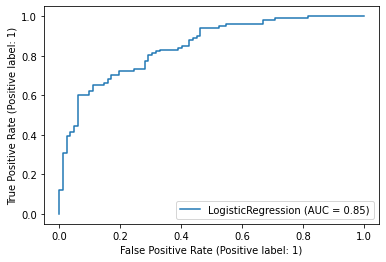

In [ ]:
# plotting roc curve
roc_curve = plot_roc_curve(clf, X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



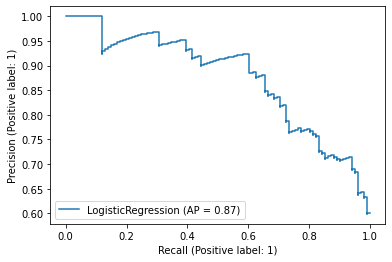

In [ ]:
# Plotting precision-recall curve
plot_precision_recall_curve(clf, X_valid, y_valid)

**Analysis of Logistic Regression Model:**

I used stratified K (5) fold validation to evaluate the model as the binary target variable was unbalanced (55.3% heart disease vs 44.7% no heart disease).


The average accuracy across all 5 folds were 82.88%. Fold 1 had the highest accuracy with 88.01%
and fold 5 had the lowest accuracy at 73.94%. In terms of precision (averaged across all 5 folds),
out of all the patients that the model predicted to have heart disease, 85% actually did. Therefore,
the high precision indicates a relatively low false positive rate. In terms of recall (averaged across
all 5 folds), out of all the patients that actually had heart disease, the model correctly predicted
this outcome for 84.8% of those patients. Therefore, the high recall indicates a relatively low false
negative rate.
  

**Analysis of Coefficients:**

The coefficients were obtained through exponentiating the log odd coefficients. The Coefficients indicate that FastingBS (5.1), ST_Slope_Flat (4.3), Oldpeak (3.2), and ChestPainType_ASY (2.6) are the attributes to most influence the diagnosis of heart disease. 

**Analysis of the ROC Curve:**

The ROC Curve measures the trade off between sensitivity (true positive rate) and specificity (false positive rate). The AUC (Area Under the Curve) is a general measure of the model’s predictive accuracy. The higher (closer to 1) the AUC is, the better the predictive accuracy of the model. The logistic regression model has an AUC of 0.85. Therefore, the logistic regression model has relatively high predictive accuracy. 

**Analysis of the Precision-Recall Curve:**

The Precision-Recall Curve measures the trade off between precision and recall at different thresholds. The AP (average precision)/AUC is a general measure of the model’s precision and recall scores. A high AP (close to 1) represents the model having a high precision and high recall score. High precision indicates a low false positive rate, while high recall relates to low false negative rates. The logistic regression model has an AP of 0.87. Therefore, the logistic regression model has a relatively high precision and high recall score.  

# **Tree Based (Random Forest) Model (Stratified K Fold Validation):**

In [ ]:
acc_RF=[]

# Using Stratified K fold validation to evaluate model 
kf=StratifiedKFold(n_splits=5)

for fold , (trn_,val_) in enumerate(kf.split(X=df_tr,y=y)):
    
    # Separating training and validation data
    Xtr_train=df_tr.loc[trn_,feature_col_tr]
    ytr_train=df_tr.loc[trn_,target]
    
    Xtr_valid=df_tr.loc[val_,feature_col_tr]
    ytr_valid=df_tr.loc[val_,target]
    
    # Fitting random forest classifier model
    clf_2=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf_2.fit(Xtr_train,ytr_train)

    # Prediction
    ytr_pred=clf_2.predict(Xtr_valid)

    # Printing results (classification report, accuracy)
    print(f"FOLD: {fold+1} ")
    print(classification_report(ytr_valid,ytr_pred))

    acc=roc_auc_score(ytr_valid,ytr_pred)
    acc_RF.append(acc)

    print(f"Accuracy for Fold {fold+1} : {acc}\n")


FOLD: 1 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        82
           1       0.93      0.87      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Accuracy for Fold 1 : 0.8935915829746534

FOLD: 2 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        82
           1       0.92      0.80      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Accuracy for Fold 2 : 0.8592778574844573

FOLD: 3 
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        82
           1       0.77      0.99      0.87       102

    accuracy                           0.83       184
   macro avg     

**Feature Importance:**

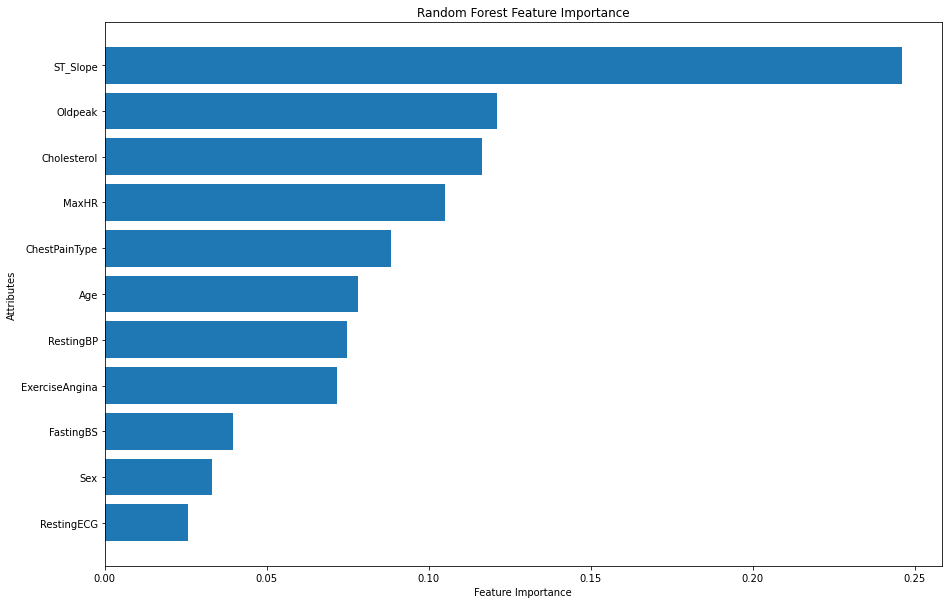

In [ ]:
plt.figure(figsize=(15,10))
feat_imp = clf_2.feature_importances_
index = np.argsort(feat_imp)
plt.title("Random Forest Feature Importance")
plt.barh(range(len(index)),feat_imp[index])
plt.yticks(range(len(index)),[feature_col_tr[i] for i in index])
plt.ylabel("Attributes")
plt.xlabel("Feature Importance")
plt.show()

**ROC Curve and Precision-Recall Curve:**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



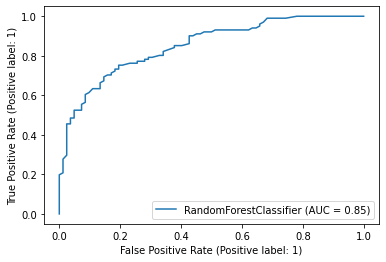

In [ ]:
# plotting roc curve
roc_curve = plot_roc_curve(clf_2, Xtr_valid, ytr_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



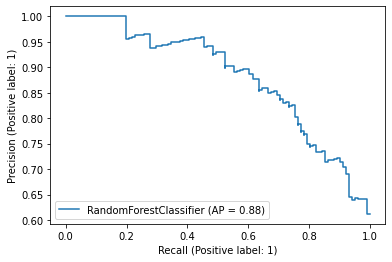

In [ ]:
# Plotting precision-recall curve
plot_precision_recall_curve(clf_2, Xtr_valid, ytr_valid)

**Analysis of Random Forest Classifier Model:**

I used stratified K (5) fold validation to evaluate the model as the binary target variable is unbalanced (55.3% heart disease vs 44.7% no heart disease). 


The average accuracy across all 5 folds were 83.23%. Fold 1 had the highest accuracy with 89.36% and fold 5 had the lowest accuracy at 76.88%. In terms of precision (averaged across all 5 folds), out of all the patients that the model predicted to have heart disease, 85% actually did. Therefore, the high precision indicates a relatively low false positive rate. In terms of recall (averaged across all 5 folds), out of all the patients that actually had heart disease, the model correctly predicted this outcome for 86% of those patients. Therefore, the high recall indicates a relatively low false negative rate.   

**Analysis of The Feature Importance:**

The random forest model shows that ST_Slope, Oldpeak, and Cholesterol are the top three most important features when predicting the patient’s heart disease status.  

**Analysis of the ROC curve:**

As mentioned, the ROC Curve measures the trade off between sensitivity (true positive rate) and specificity (false positive rate) and the AUC (Area Under the Curve) is a general measure of the model’s predictive accuracy. The random forest model has an AUC of 0.85. Therefore, the model has relatively high predictive accuracy. 

**Analysis of the Precision-Recall curve:**

As mentioned, the Precision-Recall Curve measures the trade off between precision and recall at different thresholds and the AP (average precision)/AUC is a general measure of the model’s precision and recall scores. High precision indicates a low false positive rate, while high recall relates to low false negative rates. The Random Forest model has an AP of 0.88. Therefore, the model has a relatively high precision and high recall score.  

# **Comparison between Logistic Regression Model and Random Forest Model:**

Both the Models had very similar performance for most evaluation metrics. Both models had very similar average accuracy at **82.88%** for logistic regression and **83.23%** for random forest. Both models had precision rates of **85%**. In terms of recall, the random forest model had a slightly better performance of **86%** compared to the logistic regression model which had **84.8%**. However, as the evaluation metrics are so similar across both models, it may benefit from increasing the number of folds, experimenting with other aspects of the model to improve model performance or to compare both the models with a different  tree based model (such as decision tree classifier or XGBoost).

In terms of the ROC and Precision-Recall curve, both of the models had similar metrics all around. Both the models have AUC scores of 0.85 in regard to the ROC curve, which indicates a relatively high predictive accuracy of the models. The precision-recall curve indicates that the random forest model has an AP of 0.88, while the logistic  regression model has an AP of 0.87. therefore, both the models also have a relatively high precision and recall score. 


Lastly, when comparing the logistic regression coefficients and the random forest feature importance. Both models agree that ST_Slope and Oldpeak are highly relevant in the diagnosis of Heart disease. The logistic regression model had ST_Slope_Flat as a coefficient of 4.3 and Oldpeak as a 3.2. Likewise, the random forest model pointed out ST_Slope and Oldpeak as the most important features when predicting the patient’s heart disease status.  



# **Conclusion:**

Overall, both the binary classifiers performed very similarly as both the models had an average accuracy of around 83%. In terms of precision and recall, both the models had a precision of 85% (indicating a low false positive rate), while the random forest model had a recall of 86% and the logistic regression had a recall of 85% (indicating a low false negative rate). The AUC and AP scores also showcase the similarity in the logistic regression and random forest models, both models achieved an AUC score of 0.85, and an AP score of 0.87 and 0.88 respectively. 


There were several shortcomings in regard to the methodology of the capstone project. For instance, feature engineering would have benefitted the project in removing less important attributes when training the models. Furthermore, as the evaluation metrics are so similar across both models, it may benefit from increasing the number of folds, experimenting with other aspects of the model to improve model performance or to compare both the models with a different tree-based model (such as decision tree classifier or XGBoost). 

**bold text**
In conclusion, this capstone project has shown that cardiovascular disease prevalence can be predicted with the use of simple machine learning algorithms such as logistic regression and random forest models. The continuation of this field of research is pivotal towards introducing the benefits of machine learning algorithms in the use of healthcare industries. The next steps of research should include increasing the complexity and optimization of the algorithms to increase their efficiency and efficacy. The use of live data would also benefit to further test the real world effectiveness of the models.   
